In [1]:
from t3_constants import *
from t3_utility import *

from sklearn.model_selection import train_test_split

In [2]:
with open(f'{PICKLE_FOLDER}{LABELLED}{CLUST_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

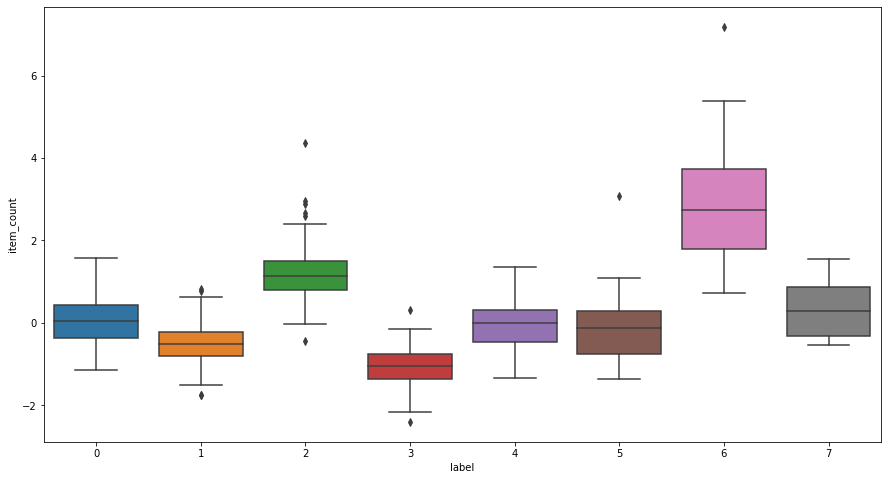

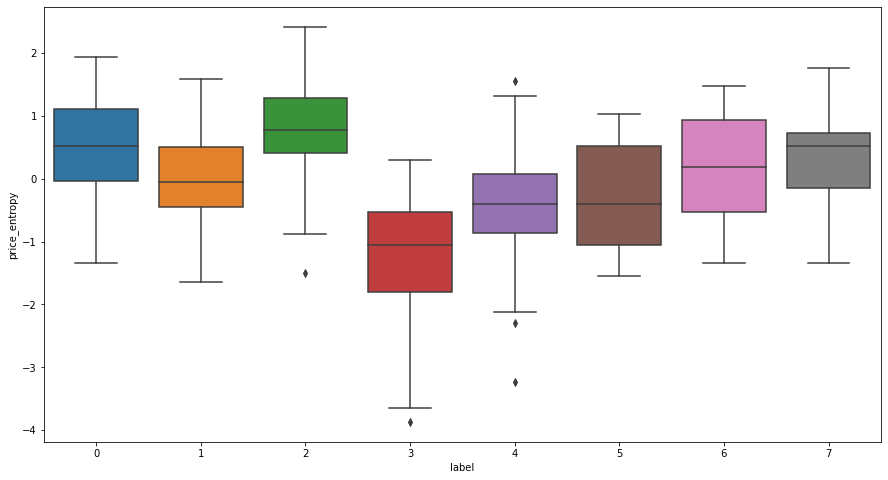

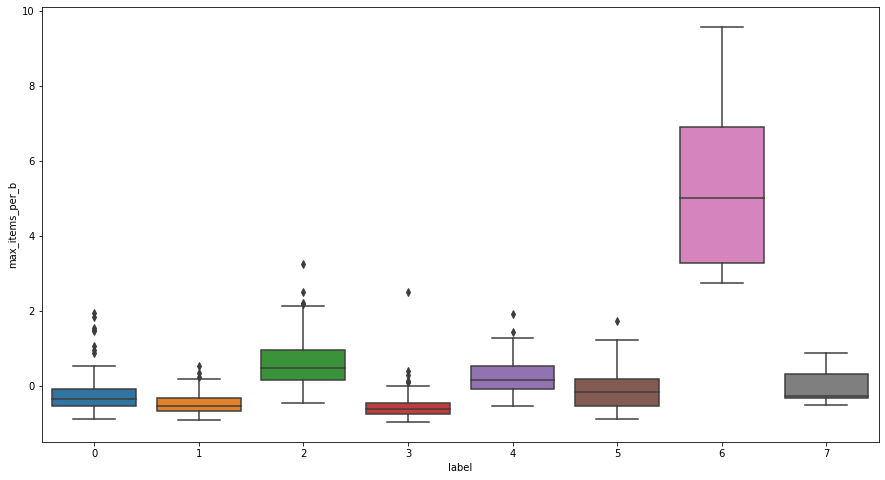

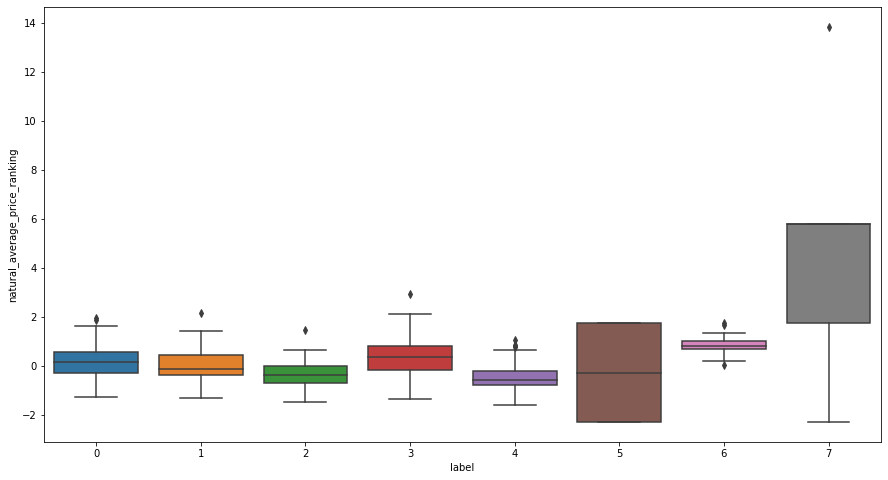

In [3]:
columns_to_show = [ICNT, PE, MIXB, NAPR]
for c in columns_to_show:
    _, ax = plt.subplots(figsize=(15,8))
    sns.boxplot(x=LAB, y=c, data=u_df)

In [4]:
### spending label
# High spending 2, 6
# Medium spending 0, 4, 5, 7
# Low spending 1, 3

u_df[SLAB] = MS
u_df.loc[u_df[LAB].isin([2, 6]), SLAB] = HS
u_df.loc[u_df[LAB].isin([1, 3]), SLAB] = LS

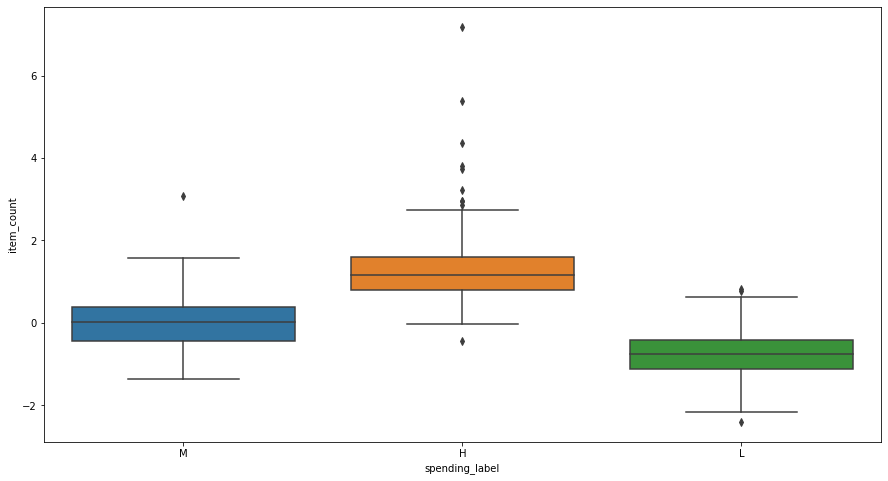

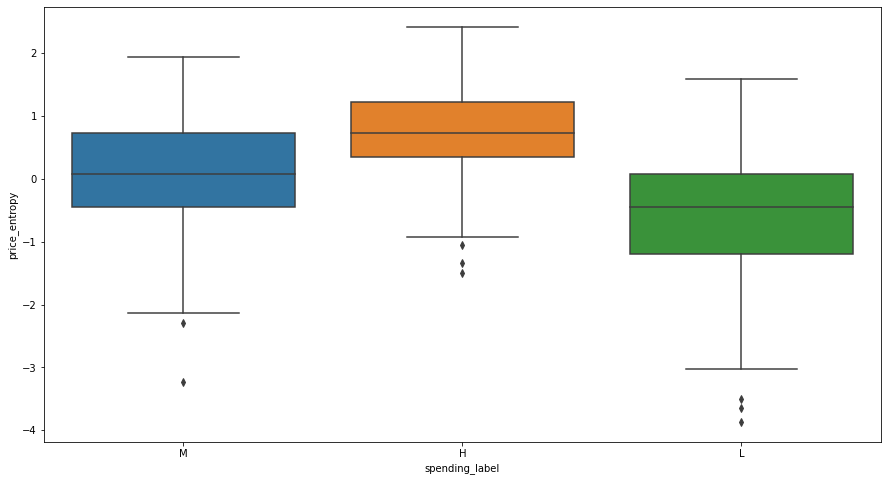

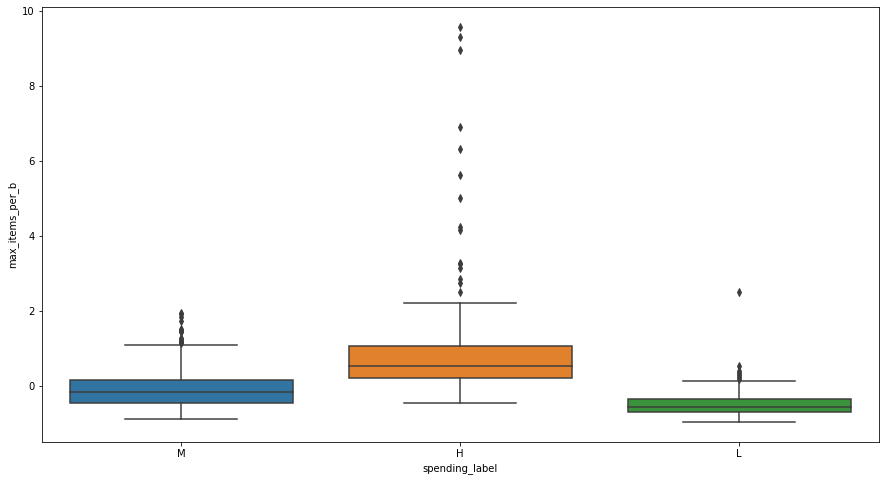

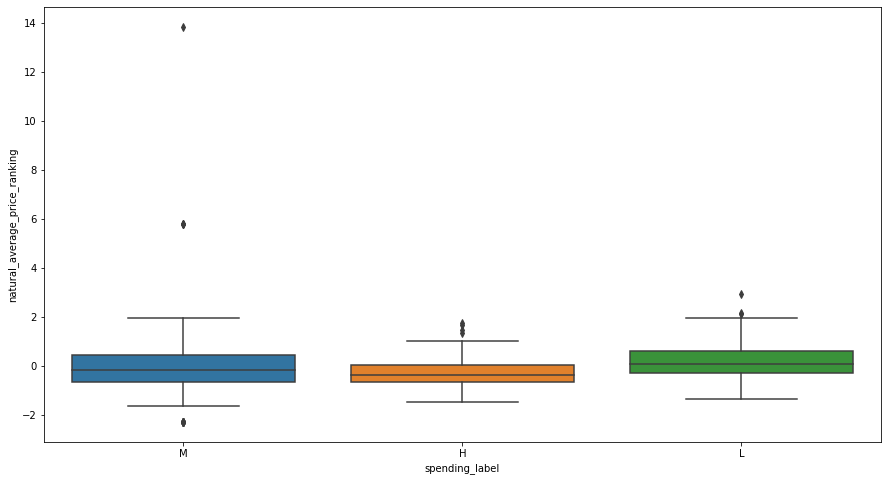

In [5]:
for c in columns_to_show:
    _, ax = plt.subplots(figsize=(15,8))
    sns.boxplot(x=SLAB, y=c, data=u_df)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(
    u_df.drop(columns=[LAB, SLAB]),
    u_df[SLAB],
    test_size = 0.2,
    stratify=u_df[SLAB])
x = train_x.values
y = train_y.values.ravel().astype(str)

In [7]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'wb') as f:
    pickle.dump(train_x, f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'wb') as f:
    pickle.dump(train_y, f)
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'wb') as f:
    pickle.dump(test_x, f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'wb') as f:
    pickle.dump(test_y, f)